<font size=5><p style="color:purple"> Postech IA para Devs - Fase 1

Tech Challenge

Grupo 4:


*   Marcos Carielo - rm357969
*   Priscila Nitta - rm357392
*   Renato Mello - rm357879
*   Vitor Soares - rm356986








<font size=5 > <p style="color:purple"> Previsão de Custos Médicos Individuais

<img src="https://cdn.lifeofpix.com/113763/_w1800/307540/lifeofpix-rawpixelcom1624-307540.webp" width="800">

**Quais Fatores Influenciam o Preço do Seguro de Saúde?**

Aqui estão alguns fatores que afetam o custo dos prêmios de seguro de saúde:

**idade:** idade do beneficiário principal

**sexo:** gênero do contratante do seguro, feminino, masculino

**IMC:** Índice de Massa Corporal, entendendo o peso do corpo em relação à altura, índice objetivo do peso corporal (kg/m²), idealmente de 18.5 a 24.9

**filhos:** Número de crianças cobertas pelo seguro de saúde / Número de dependentes

**fumante:** Fumante

**região:** área residencial do beneficiário.</font>


<font size=5><p style="color:purple">1. Exploração de Dados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Colunas:**

age: idade do beneficiário principal

sex: gênero do contratante do seguro, feminino, masculino

bmi (IMC): índice de massa corporal, fornecendo uma compreensão do corpo, pesos que são relativamente altos ou baixos em relação à altura,
índice objetivo do peso corporal (kg / m ^ 2) usando a proporção de altura para peso, idealmente 18,5 a 24,9

children: número de crianças cobertas pelo seguro saúde / número de dependentes

smoker: tabagismo

region: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

charges (encargos): custos médicos individuais cobrados pelo seguro saúde

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Cálculo do coeficiente de variação
mean = df['charges'].mean()
std = df['charges'].std()

cv = (std / mean) * 100

print(f"Média: {mean}")
print(f"Desvio Padrão: {std}")
print(f"Coeficiente de Variação (CV): {cv:.2f}%")

# Interpretação do CV
if cv < 10:
    print("Baixa variabilidade")
elif cv < 20:
    print("Moderada variabilidade")
else:
    print("Alta variabilidade")

Média: 13270.422265141257
Desvio Padrão: 12110.011236694001
Coeficiente de Variação (CV): 91.26%
Alta variabilidade


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Temos 0 valores nulos.
Agora vamos fazer a análise exploratória de dados com alguns gráficos. Primeiro, veremos como os encargos são distribuídos de acordo com as características dadas

Text(0.5, 1.0, 'Distribuição de Encargos')

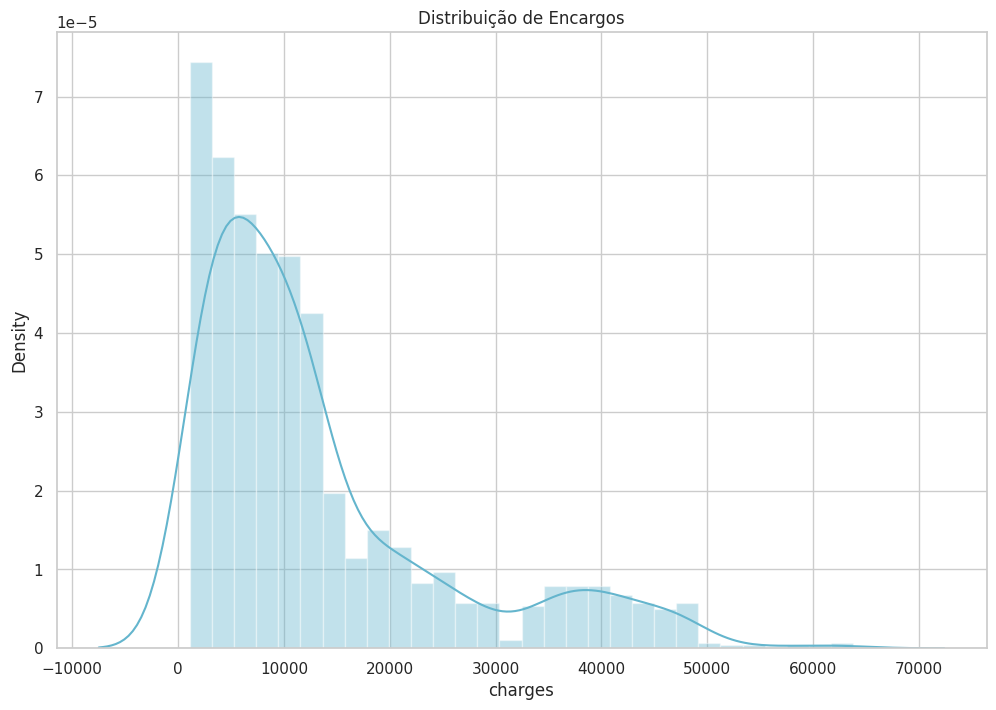

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribuição de Encargos')

Esta distribuição é assimétrica à direita. Para torná-la mais próxima do normal, podemos aplicar o logaritmo natural

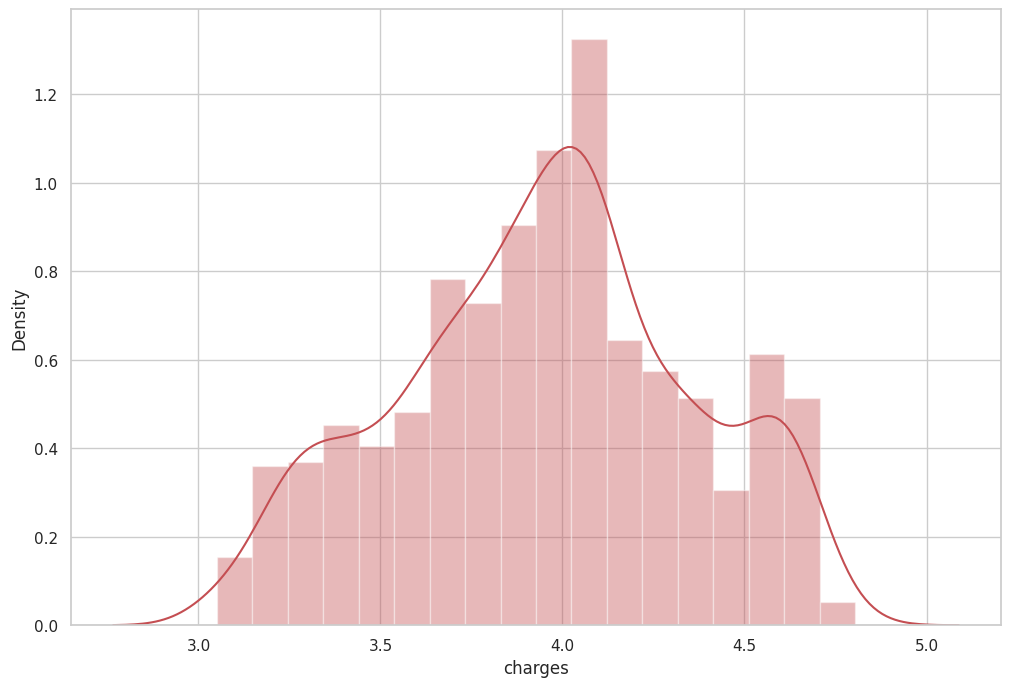

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

Agora vamos analisar as taxas por região


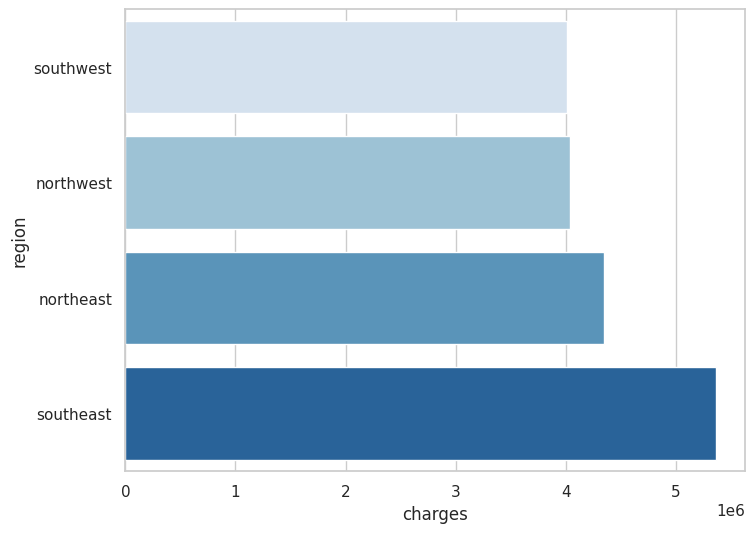

In [ ]:
# Agrupar e ordenar os dados
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)

# Criar a figura e os eixos
f, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plotar o gráfico de barras
sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues', ax=ax)

# Exibir o gráfico
plt.show()

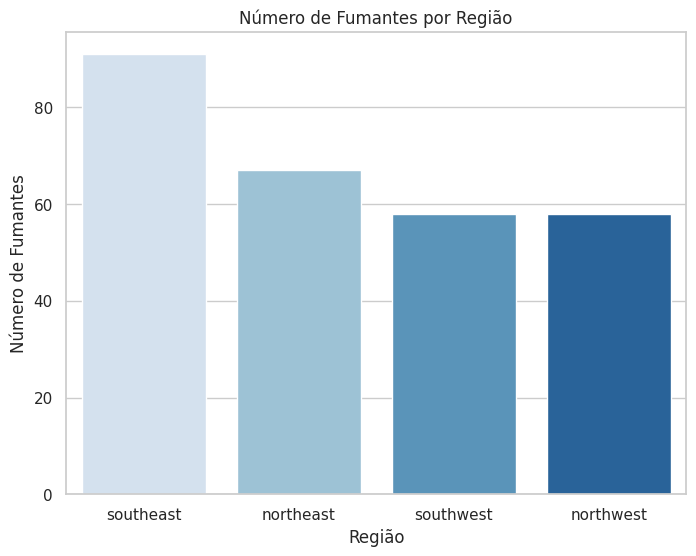

In [ ]:
# Filtrando apenas os fumantes
smokers = df[df['smoker'] == 'yes']

# Contagem de fumantes por região
smokers_by_region = smokers['region'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=smokers_by_region.index, y=smokers_by_region.values, palette='Blues')

# Configurações do gráfico
plt.xlabel('Região')
plt.ylabel('Número de Fumantes')
plt.title('Número de Fumantes por Região')
plt.show()

## Análise por Genero

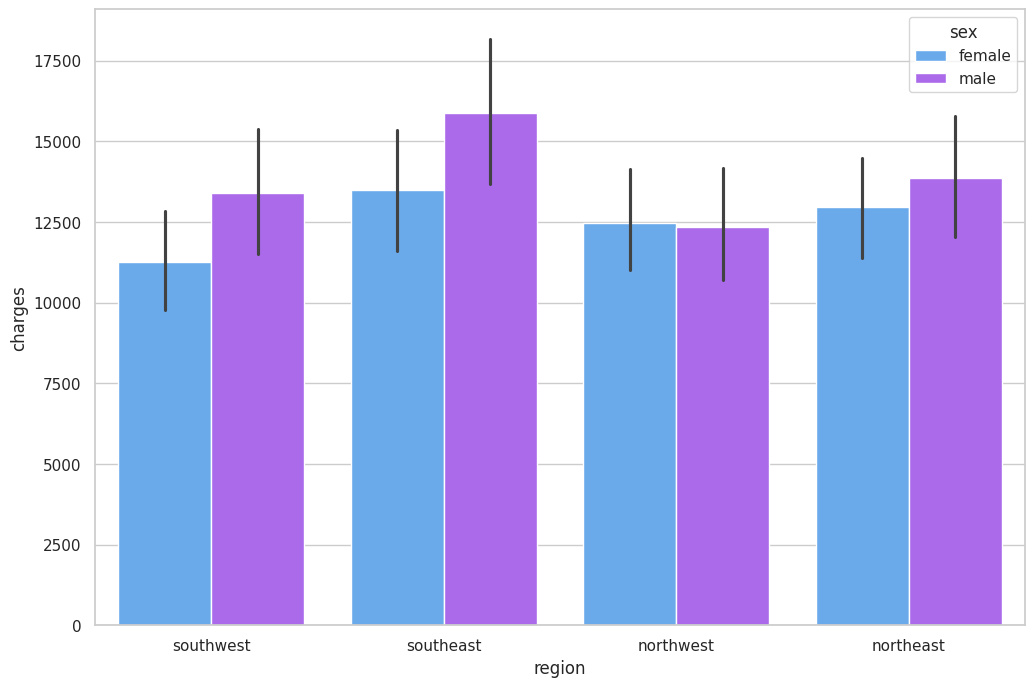

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

Então, no geral, as maiores taxas médicas estão no Sudeste e as menores no Sudoeste. Levando em conta certos fatores (sexo, tabagismo, ter filhos), vamos ver como isso muda por região

##Análise por Tabagismo


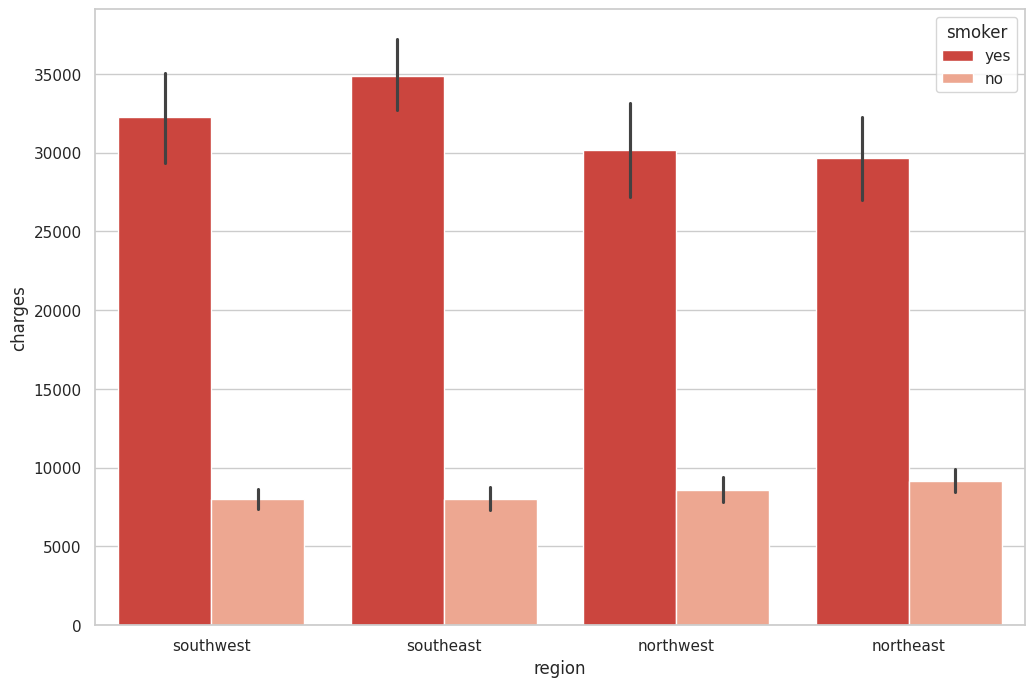

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

##Análise por quantidade de filhos

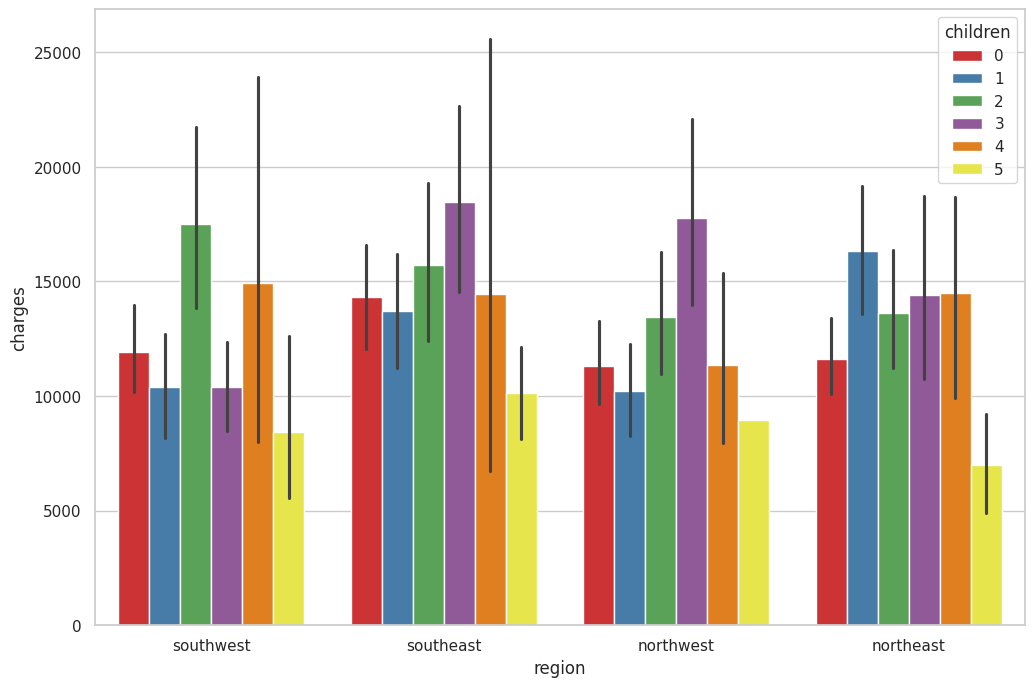

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

Como podemos ver nesses gráficos de barras, as maiores taxas devido ao fumo ainda estão no Sudeste, mas as menores estão no Nordeste. As pessoas no Sudoeste geralmente fumam mais do que as pessoas no Nordeste, mas as pessoas no Nordeste têm taxas mais altas por gênero do que no Sudoeste e Noroeste em geral. Segundo os dados, a quantidade de filhos aparenta não influênciar na quantidade de encargos de uma forma expressiva.

Agora vamos analisar os custos médicos por idade, IMC e filhos de acordo com o fator tabagismo

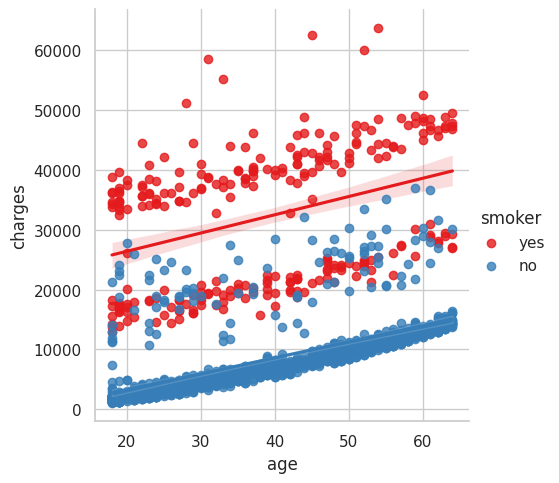

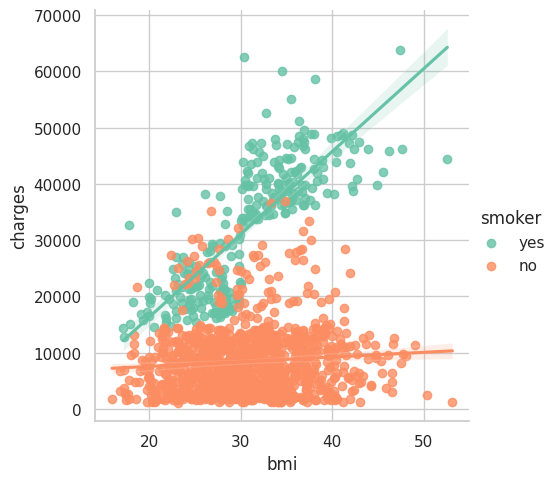

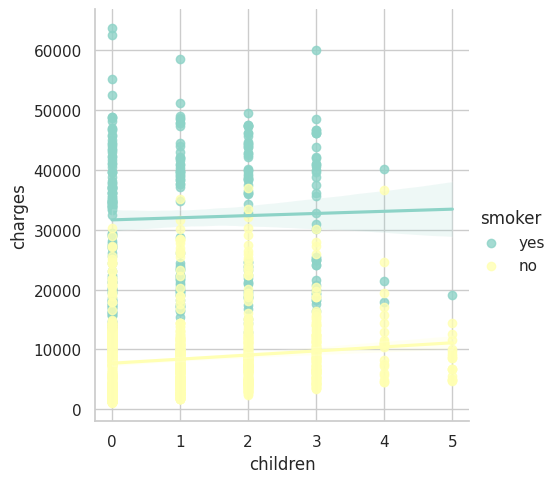

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Fumar tem o maior impacto nos custos médicos, embora os custos estejam crescendo com a idade e IMC.
Podemos tentar analisar a correlação entre quantidade de filhos e tabagismo, com os seguintes violinplots:

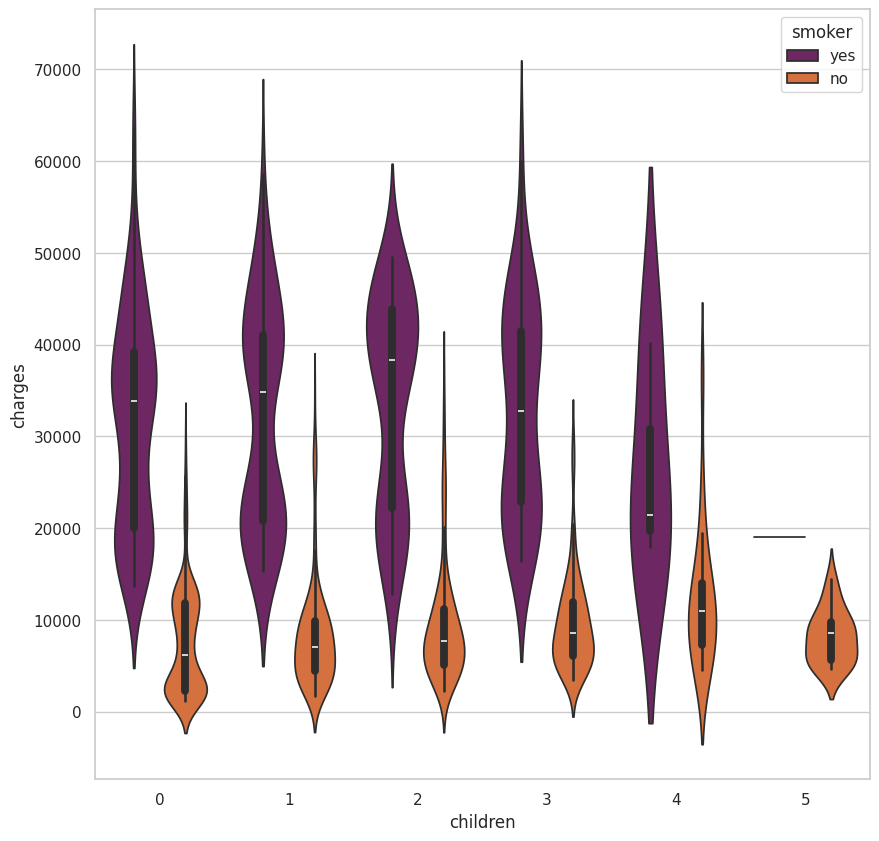

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

Depois da análise, vemos que a correlação entre quantidade de filhos e tabagismo não é relevante para a variável de encargos.

<font size=5><p style="color:purple">2. Pré-processamento de dados


In [ ]:
# Convertendo campos de tipo object para o tipo category
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [ ]:
# Convertendo a catergoria de labels para numéricos usando o LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


##Matriz de correlação

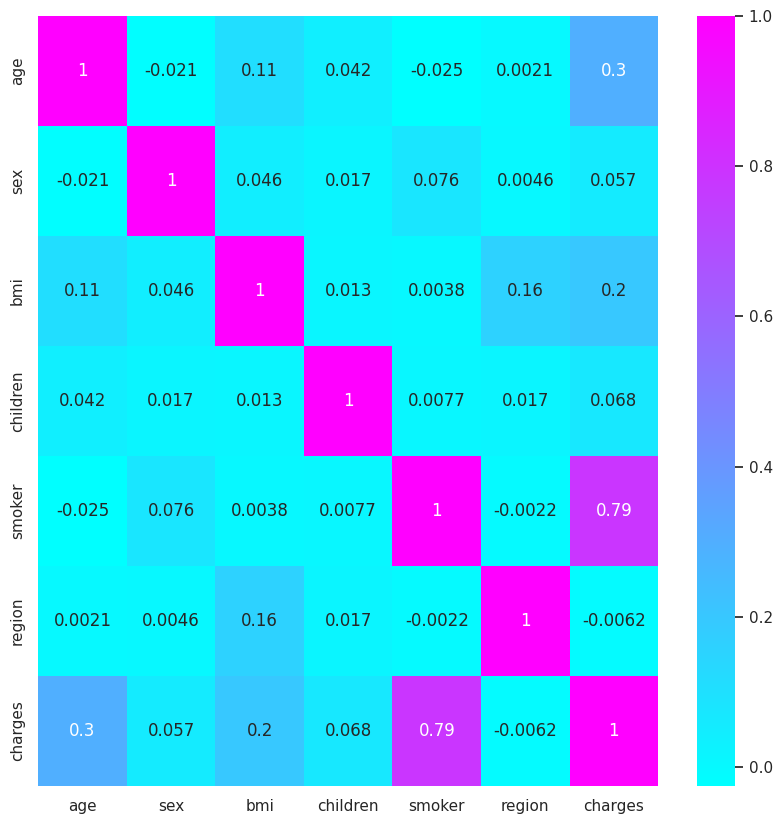

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

Nenhuma correlação forte, exceto com o tabagismo.
Podemos observar uma correlação mais fraca com idade e IMC.

<font size=5><p style="color:purple">3. Modelagem

In [ ]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = split(x, y, test_size=0.2, random_state=45)


<font size=5><p style="color:purple">4. Treinamento e avaliação do modelo


### Regressão Linear

In [ ]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11910.538156786193
[  254.97145832   320.6190203    430.54569459 23587.5571278 ]
0.7978274606303823


In [ ]:
# Adicionando constante ao modelo
X_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Resumo do modelo estatístico
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     742.8
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          3.00e-306
Time:                        19:22:18   Log-Likelihood:                -10853.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1065   BIC:                         2.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.191e+04   1059.711    -11.239      0.0


##Regressão Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures(degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = split(x_pol, y, test_size=0.2, random_state=45)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-4478.973930570726
[ 0.00000000e+00 -1.23410065e+02  5.57339736e+02  1.98640104e+03
 -9.56295534e+03  4.12926722e+00  1.82541691e+00 -1.34857757e+01
  1.95075335e+01 -9.95198740e+00 -5.82045536e+00  1.39180122e+03
 -1.64078764e+02 -2.85832101e+02 -9.56295534e+03]
0.8174033242514602


In [ ]:
# Avaliando a performance do algoritmo
print('Erro Médio Absoluto (Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_test_pred))
print('Erro Quadrático Médio (Mean Squared Error):', metrics.mean_squared_error(y_test, y_test_pred))
print('Raiz do Erro Quadrático Médio (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Erro Médio Absoluto (Mean Absolute Error): 2941.47429113368
Erro Quadrático Médio (Mean Squared Error): 23631231.194005687
Raiz do Erro Quadrático Médio (Root Mean Squared Error): 4861.196477618004


            Atual      Prevista
910    2639.04290   5104.541178
823    8219.20390  10032.859872
677   46130.52650  40434.611074
559    1646.42970   3138.266508
1169   6112.35295   7468.536014
...           ...           ...
1080  11884.04858   5348.575104
699    3500.61230   5294.158769
1127   5836.52040   7694.694818
1032   4137.52270   4867.685186
920   13451.12200  14285.402736

[268 rows x 2 columns]


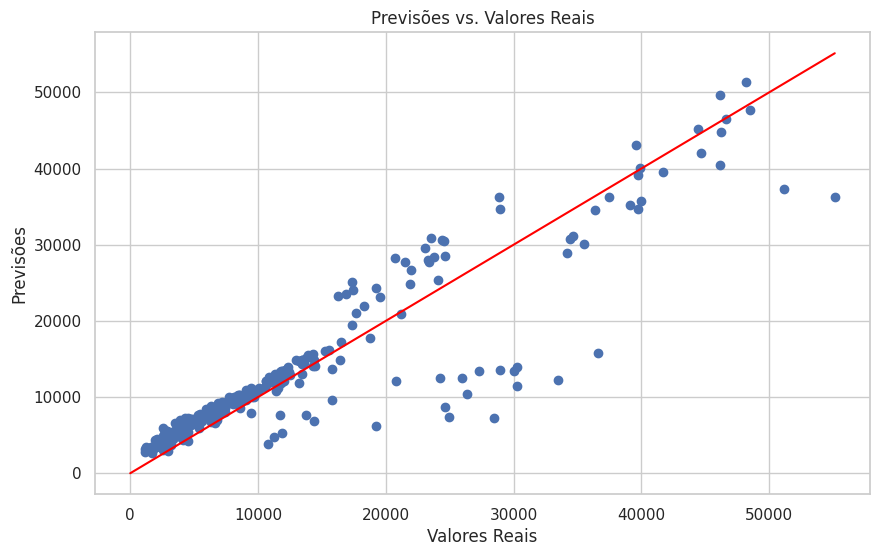

In [ ]:
# Prevendo as cobranças
y_test_pred = Pol_reg.predict(x_test)
# Comparando os valores atuais com os previstos
df_compare = pd.DataFrame({'Atual': y_test, 'Prevista': y_test_pred})
print(df_compare)

# Visualização das previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()

<font size=5><p style="color:purple">5. Validação Estatística

In [ ]:
import statsmodels.api as sm

# Adicionando constante ao modelo
X_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Resumo do modelo estatístico
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     453.1
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:22:44   Log-Likelihood:                -10585.
No. Observations:                1070   AIC:                         2.120e+04
Df Residuals:                    1056   BIC:                         2.127e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4478.9739   3588.933     -1.248      0.2

In [ ]:
# Nome das novas features após a transformação polinomial
feature_names = pol.get_feature_names_out(x.columns)
print(feature_names)

['1' 'age' 'bmi' 'children' 'smoker' 'age^2' 'age bmi' 'age children'
 'age smoker' 'bmi^2' 'bmi children' 'bmi smoker' 'children^2'
 'children smoker' 'smoker^2']


<font size=5><p style="color:purple">6. Relatório e Análise dos Resultados

Análise dos Resultados

- Melhor modelo: Regressão Polinomial
- **Mean Squared Error (MSE):** 23631231.194005687
- **R^2 Score:** 0.848

Insights Obtidos

- A variával com maior impacto nos custos médicos é **fumar**, depois é **idade** e **IMC**.
- As pessoas da amostra estão a cima do peso.
- Talvez campanhas de conscientização para melhoria de habitos de saúde referente ao tabagismo e alimentação saudável sejam indicados.

Validação Estatística

- O valor p para as variáveis x2, x3, x4, x5, x9, x11 indica que elas são estatisticamente significativas para o modelo.
- O intervalo de confiança para os coeficientes mostra que essas variáveis têm uma influência significativa nos custos médicos, e como os intervalos de confiança para essas variáveis não incluem zero, isso reforça sua importância no modelo.



**Observações**

É interessante observar que, embora os histogramas possam indicar uma relação linear, o modelo de regressão polinomial pode ainda assim se sair melhor devido a vários fatores que um simples olhar para o gráfico pode não capturar completamente. Aqui estão algumas razões pelas quais o modelo polinomial pode ter se saído melhor:

**1) Captura de Padrões Não Lineares:** Embora os gráficos pareçam indicar uma tendência linear, pode haver pequenas curvaturas ou padrões complexos nos dados que são mais bem capturados por um modelo polinomial. Mesmo uma pequena curvatura que o olho nu pode não perceber pode ser significativa o suficiente para melhorar o ajuste do modelo.

**2) Heterocedasticidade:** Em muitos casos, a variância dos erros aumenta ou diminui com a idade ou outros fatores. Um modelo polinomial pode capturar essa heterocedasticidade (variação na dispersão dos dados) melhor do que um modelo linear simples.

**3) Interações e Efeitos de Segunda Ordem:** Os modelos polinomiais têm a capacidade de capturar interações complexas entre variáveis ou efeitos de segunda ordem (como quadráticos). Mesmo que a relação geral pareça linear, pode haver nuances nos dados que um modelo linear não consegue captar, mas que um polinomial sim.

**4) Outliers e Influência:** Os outliers e os dados com alta influência podem ter um impacto significativo em um modelo linear. Um modelo polinomial pode ajustar melhor esses pontos e fornecer uma estimativa global mais precisa.

**5) Overfitting Controlado:** Se você aplicou uma regressão polinomial de baixa ordem (como uma polinomial de segunda ordem), ela pode capturar a relação subjacente nos dados melhor do que uma linha reta sem overfitting. O polinômio de baixa ordem ainda manteria uma simplicidade relativa, enquanto melhora o ajuste.

**Conclusão:** Embora os gráficos iniciais possam indicar uma tendência linear, os detalhes mais sutis nos dados, que não são imediatamente visíveis, podem ser melhor capturados por um modelo polinomial, resultando em um desempenho superior. Isso mostra a importância de testar diferentes modelos para encontrar o que melhor se ajusta aos dados, em vez de confiar apenas na interpretação visual inicial.